<a href="https://colab.research.google.com/github/Jo-Minseok/DataProgramming/blob/main/Global_Warming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#단계 1 : 폰트 설치
import matplotlib.font_manager as fm #matplotlib 폰트 관련 모듈 import

!apt-get -qq -y install fonts-nanum > /dev/null
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = font_path, size = 9)
fm._rebuild() #폰트 매니저 재갱신, 새로고침을 하는 것, 런타임 새로고침이랑 비슷함

In [ ]:
#단계 2 : 런타임 재시작
import os #os 모듈 import
os.kill(os.getpid(), 9) #os.getpid()함수로 pid값 = Process Identification Number(현재의 프로세스 ID)라고 하는 값을 얻은 후, os.kill(pid, signal.sigstop) 형식으로, 프로세스 pid에 시그널 sig를 보냄, 호스트 플랫폼에서 사용할 수 있는 구체적인 시그널에 대한 상수는 signal 모듈에 정의되어 있음

In [ ]:
#단계 3 : 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

#마이너스 표시 문제 해결
mpl.rcParams['axes.unicode_minus'] = False
	
#한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname = font_path, size = 18).get_name()
plt.rc('font', family = font_name)
fm._rebuild()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

path = './drive/MyDrive/Global Warming/'
csv_file1 = path + 'BusanTemperature.csv'
tp = pd.read_csv(csv_file1, encoding = 'CP949')
tp

,지점,지점명,일시,평균기온(°C),평균최저기온(°C),평균최고기온(°C)
0,159,부산,1905,13.9,11.0,17.9
1,159,부산,1906,13.0,9.5,16.8
2,159,부산,1907,13.5,9.8,17.6
3,159,부산,1908,13.3,9.7,17.2
4,159,부산,1909,13.4,9.7,17.8
...,...,...,...,...,...,...
112,159,부산,2017,15.2,11.7,19.6
113,159,부산,2018,15.1,11.8,19.2
114,159,부산,2019,15.7,12.5,19.8
115,159,부산,2020,15.2,11.9,19.4


In [ ]:
tp.drop(columns = ['지점', '지점명'], axis = 1, inplace = True)
tp.set_index('일시', inplace = True)
tp

,평균기온(°C),평균최저기온(°C),평균최고기온(°C)
일시,,,
1905,13.9,11.0,17.9
1906,13.0,9.5,16.8
1907,13.5,9.8,17.6
1908,13.3,9.7,17.2
1909,13.4,9.7,17.8
...,...,...,...
2017,15.2,11.7,19.6
2018,15.1,11.8,19.2
2019,15.7,12.5,19.8


In [ ]:
x = np.asarray(tp.index)
y1 = tp['평균기온(°C)']
y2 = tp['평균최저기온(°C)']
y3 = tp['평균최고기온(°C)']

Text(0, 0.5, '기온(°C)')

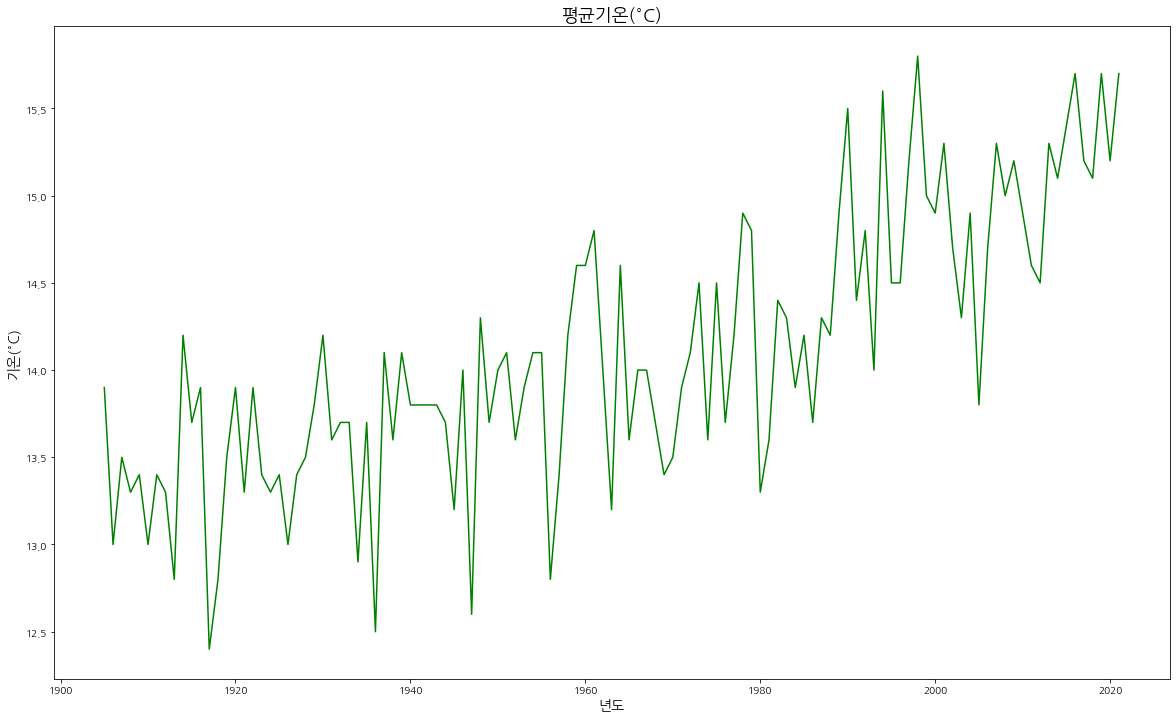

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(x, y1, 'g')
plt.title('평균기온(°C)', fontsize = 18)
plt.xlabel('년도', fontsize = 14)
plt.ylabel('기온(°C)', fontsize = 14)

Text(0, 0.5, '기온(°C)')

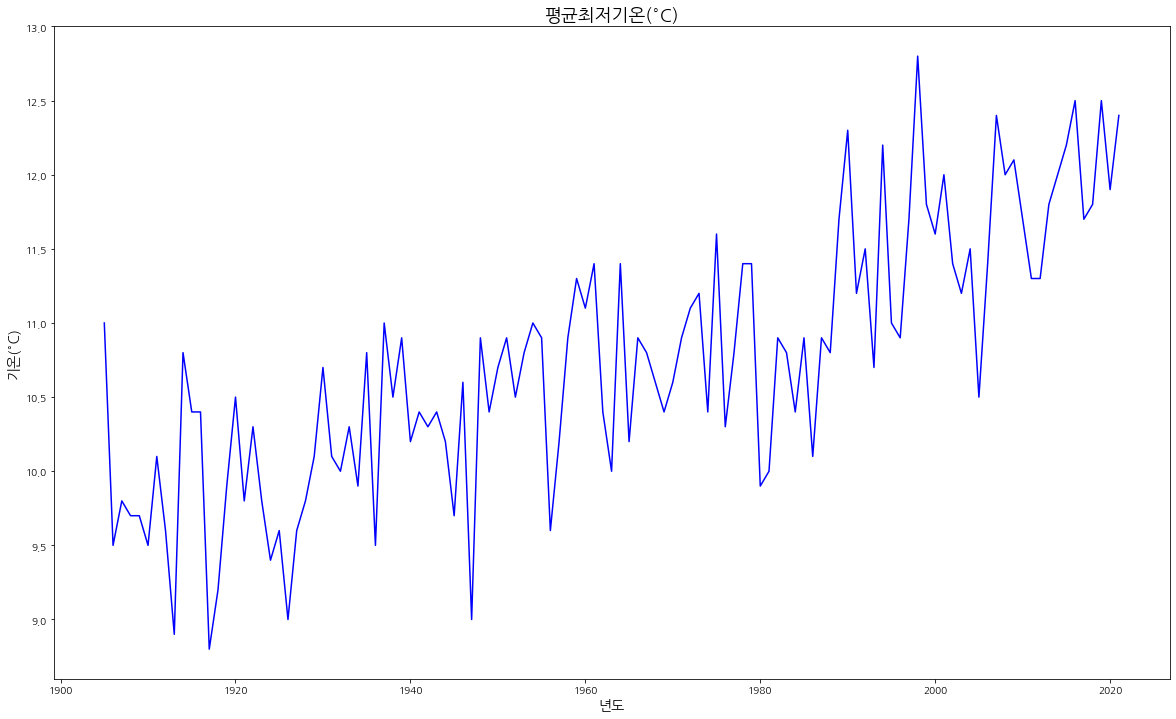

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(x, y2, 'b')
plt.title('평균최저기온(°C)', fontsize = 18)
plt.xlabel('년도', fontsize = 14)
plt.ylabel('기온(°C)', fontsize = 14)

Text(0, 0.5, '기온(°C)')

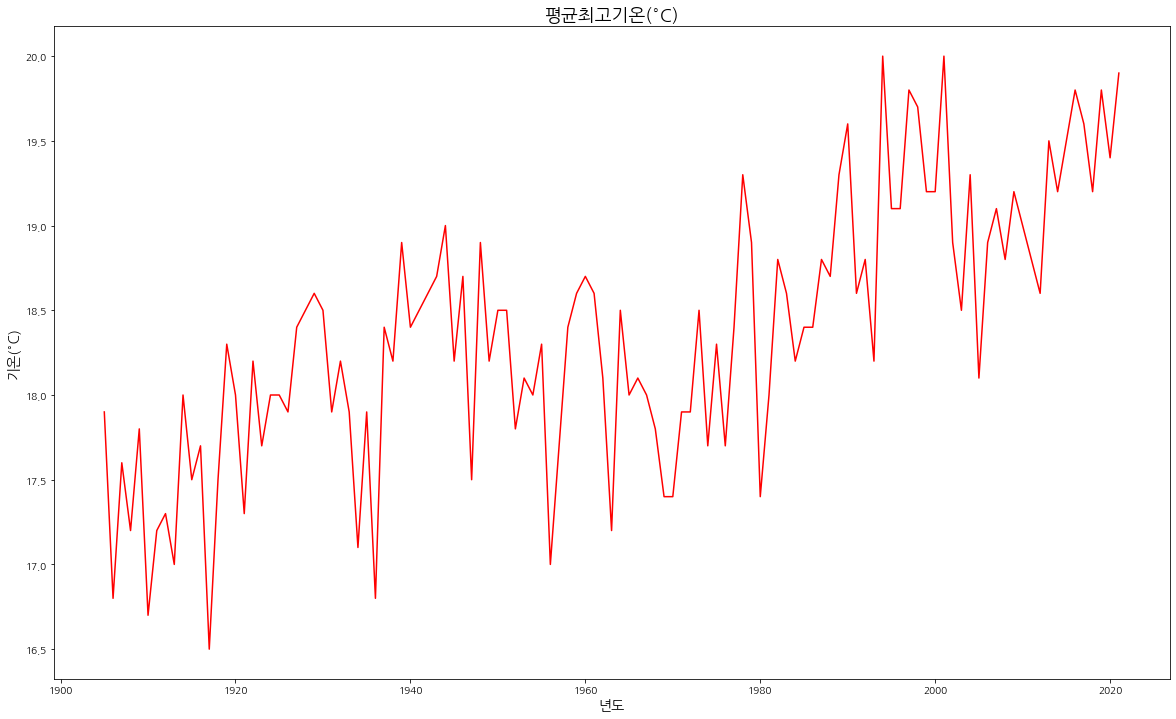

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(x, y3, 'r')
plt.title('평균최고기온(°C)', fontsize = 18)
plt.xlabel('년도', fontsize = 14)
plt.ylabel('기온(°C)', fontsize = 14)

Text(0, 0.5, '기온(°C)')

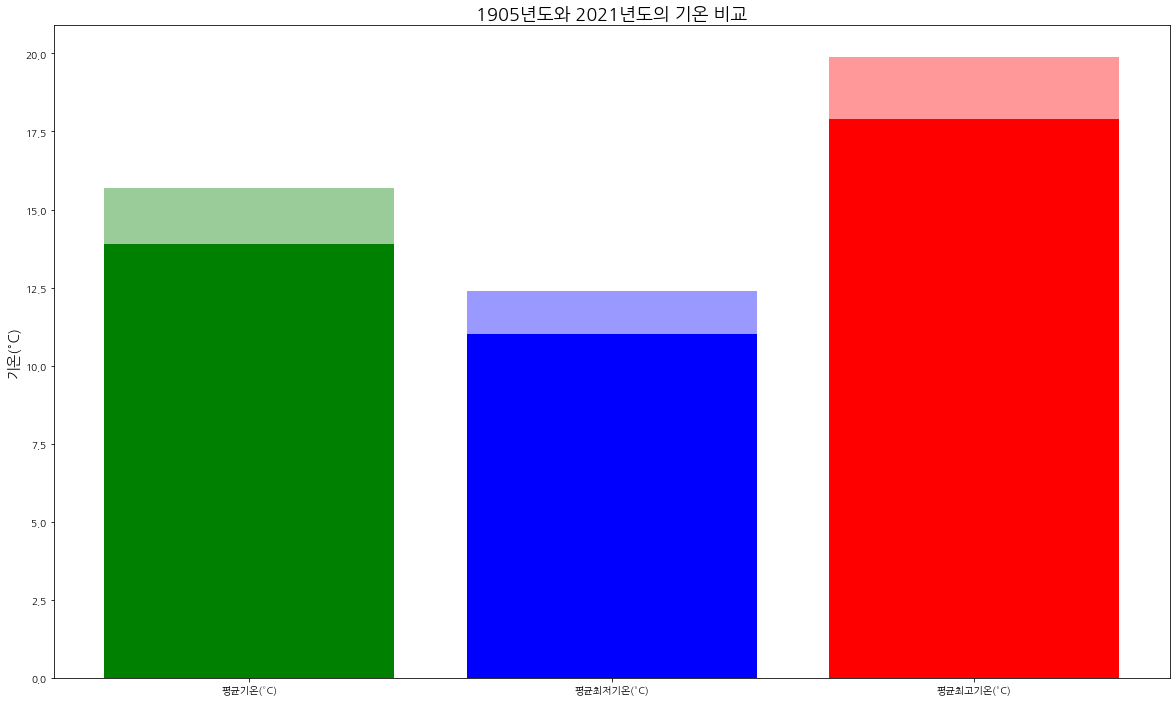

In [ ]:
x = np.arange(3)
xt = ['평균기온(°C)', '평균최저기온(°C)', '평균최고기온(°C)']
tp_past = [tp['평균기온(°C)'].iloc[0], tp['평균최저기온(°C)'].iloc[0], tp['평균최고기온(°C)'].iloc[0]]
tp_now = [tp['평균기온(°C)'].iloc[-1], tp['평균최저기온(°C)'].iloc[-1], tp['평균최고기온(°C)'].iloc[-1]]

plt.figure(figsize = (20, 12))
plt.bar(x, tp_past, color = ['green', 'blue', 'red'])
plt.bar(x, tp_now, color = ['green', 'blue', 'red'], alpha = 0.4)
plt.xticks(x, xt)
plt.title(str(tp.index[0]) + '년도와 ' + str(tp.index[-1]) + '년도의 기온 비교', fontsize = 18)
plt.ylabel('기온(°C)', fontsize = 14)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def Poly(x):
  poly_features = PolynomialFeatures(degree = 2, include_bias =  False)
  return poly_features.fit_transform(x)

def Predict_Temperature(tem, year, visual = True):
  x = np.asarray(tem.index).reshape(-1, 1)
  poly_x = Poly(x)
  x_pred = np.arange(tem.index[0], year + 1).reshape(-1, 1)
  poly_x_pred = Poly(x_pred)
  y = np.asarray(tem)
  
  lr = LinearRegression()
  lr.fit(x, y)
  y_predict = lr.predict(x)
  rmse = np.sqrt(mean_squared_error(y, y_predict))

  poly_lr = LinearRegression()
  poly_lr.fit(poly_x, y)
  poly_y_predict = poly_lr.predict(poly_x)
  poly_rmse = np.sqrt(mean_squared_error(y, poly_y_predict))

  if rmse > poly_rmse:
    lr = poly_lr
    x_pred = poly_x_pred
    y_predict = poly_y_predict

  y_pred = lr.predict(x_pred)
  diff = (y - y_predict).max()

  if visual:
    plt.figure(figsize = (20, 12))
    plt.scatter(tem.index, y, c = 'r', label = tem.name)
    plt.plot(x_pred[:, 0], y_pred, c = 'c', label = 'Regression Line')
    plt.plot(x_pred[:, 0], y_pred + diff, c = 'k', label = 'Regression Line(Maximum)')
    plt.scatter(x_pred[-1, 0], y_pred[-1], c = 'r', s = 120, label = 'Prediction Point')
    plt.scatter(x_pred[-1, 0], y_pred[-1] + diff, c = 'r', s = 120)
    plt.title(tem.name + ' 회귀 분석' , fontsize = 18)
    plt.xlabel('년도', fontsize = 14)
    plt.ylabel('기온(°C)', fontsize = 14)
    plt.fill_between(x_pred[:, 0], y_pred, y_pred + diff, color = 'red', alpha = 0.5)
    plt.legend(fontsize = 22)

  return (y_pred, y_pred + diff)

                     선형회귀 예측
-------------------------------------------------------
2100년의 평균기온(°C) 평균값 : 18.843
2100년의 평균기온(°C) 최대값 : 19.93
2021년 대비 평균기온(°C) 상승량(평균값 기준) : 3.143
2021년 대비 평균기온(°C) 상승량(최대값 기준) : 4.23
-------------------------------------------------------


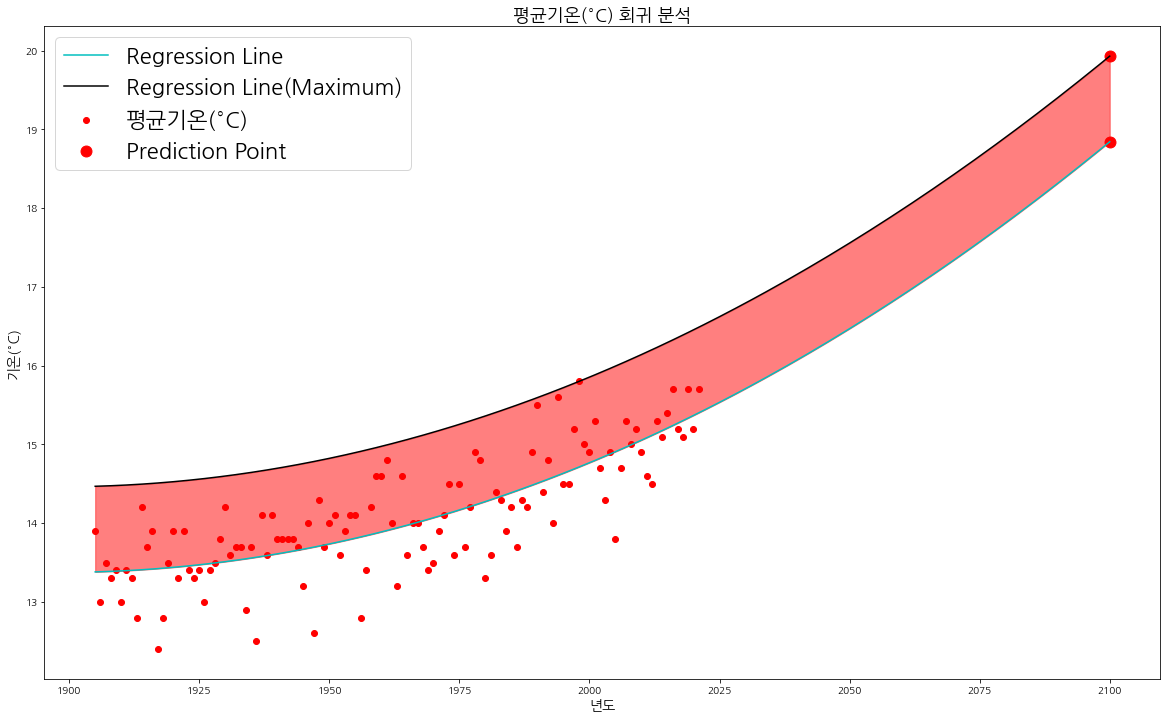

In [ ]:
data = tp['평균기온(°C)'] #평균기온, 평균최저기온, 평균최고기온 설정에 따라 함수 실행 결과가 달라짐
year = 2100 #@param {type : 'slider', min : 2022, max : 2100, step : 1}

tp_pred, tp_pred_max = Predict_Temperature(data, year)

print(' ' * 21 + '선형회귀 예측')
print('-' * 55)
print(str(year) + '년의 ' + data.name + ' 평균값 :', round(tp_pred[-1], 3))
print(str(year) + '년의 ' + data.name + ' 최대값 :', round(tp_pred_max[-1], 3))
print('2021년 대비 ' + data.name + ' 상승량(평균값 기준) :', round(tp_pred[-1] - data.iloc[-1], 3))
print('2021년 대비 ' + data.name + ' 상승량(최대값 기준) :', round(tp_pred_max[-1] - data.iloc[-1], 3))
print('-' * 55)

In [ ]:
csv_file2 = path + 'CarbonEmissions.csv'
ce = pd.read_csv(csv_file2, encoding = 'CP949', index_col = 0)
ce

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
총배출량,292.1,315.3,343.3,378.5,403.5,433.8,470.2,501.9,431.4,469.4,...,656.0,684.7,688.0,697.3,692.1,692.6,693.6,710.7,727.0,701.4
순배출량,254.4,281.9,310.7,347.7,370.4,402.5,435.5,462.4,383.3,413.8,...,601.3,631.4,640.0,653.9,647.7,647.0,647.1,668.2,685.0,661.8
에너지,240.3,258.1,279.0,308.5,327.8,352.0,385.6,411.6,351.5,382.1,...,565.7,594.7,596.0,604.5,596.9,600.3,602.2,615.6,632.6,611.5
산업공정,20.4,24.4,30.0,34.4,38.7,43.1,44.8,49.6,40.8,48.4,...,52.9,52.9,54.4,55.1,57.9,54.5,53.5,56.5,55.8,52.0
농업,21.0,21.2,21.6,22.1,22.6,22.8,23.3,23.3,23.1,21.9,...,22.1,21.1,21.5,21.3,21.4,21.0,20.8,21.0,21.1,21.0
LULUCF,-37.7,-33.5,-32.7,-30.9,-33.1,-31.3,-34.7,-39.5,-48.1,-55.5,...,-54.8,-53.3,-48.0,-43.4,-44.4,-45.6,-46.5,-42.6,-42.1,-39.6
폐기물,10.4,11.6,12.7,13.5,14.4,15.8,16.6,17.3,16.1,16.9,...,15.4,16.0,16.1,16.4,15.9,16.8,17.1,17.7,17.5,16.9
총배출량 증감률(%),0.0,8.0,8.9,10.3,6.6,7.5,8.4,6.7,-14.0,8.8,...,9.7,4.4,0.5,1.3,-0.7,0.1,0.2,2.5,2.3,-3.5


In [ ]:
ce = ce.T
ce.index = ce.index.astype(int)
ce

,총배출량,순배출량,에너지,산업공정,농업,LULUCF,폐기물,총배출량 증감률(%)
1990,292.1,254.4,240.3,20.4,21.0,-37.7,10.4,0.0
1991,315.3,281.9,258.1,24.4,21.2,-33.5,11.6,8.0
1992,343.3,310.7,279.0,30.0,21.6,-32.7,12.7,8.9
1993,378.5,347.7,308.5,34.4,22.1,-30.9,13.5,10.3
1994,403.5,370.4,327.8,38.7,22.6,-33.1,14.4,6.6
1995,433.8,402.5,352.0,43.1,22.8,-31.3,15.8,7.5
1996,470.2,435.5,385.6,44.8,23.3,-34.7,16.6,8.4
1997,501.9,462.4,411.6,49.6,23.3,-39.5,17.3,6.7
1998,431.4,383.3,351.5,40.8,23.1,-48.1,16.1,-14.0
1999,469.4,413.8,382.1,48.4,21.9,-55.5,16.9,8.8


In [ ]:
csv_file3 = path + 'ArcticGlacierArea.csv'
ag = pd.read_csv(csv_file3, index_col = 0)
ag

,Year,Extent,Area,t
1,1979,7.22,4.54,1
2,1980,7.86,4.83,2
3,1981,7.25,4.38,3
4,1982,7.45,4.38,4
5,1983,7.54,4.64,5
6,1984,7.11,4.04,6
7,1985,6.93,4.18,7
8,1986,7.55,4.67,8
9,1987,7.51,5.61,9
10,1988,7.53,5.32,10


In [ ]:
ag.drop(columns = ['t'], axis = 1, inplace = True)
ag.set_index('Year', inplace = True)
ag

,Extent,Area
Year,,
1979,7.22,4.54
1980,7.86,4.83
1981,7.25,4.38
1982,7.45,4.38
1983,7.54,4.64
1984,7.11,4.04
1985,6.93,4.18
1986,7.55,4.67
1987,7.51,5.61


In [ ]:
csv_file4 = path + 'BusanSeaLevel.csv'
sl = pd.read_csv(csv_file4, index_col = 0)
sl

,해수면 높이
연도,
1989,69.0
1990,66.4
1991,69.7
1992,70.1
1993,67.3
1994,68.2
1995,66.2
1996,66.2
1997,68.6


In [ ]:
start_year = max(tp.index[0], ce.index[0], ag.index[0], sl.index[0])
end_year = min(tp.index[-1], ce.index[-1], ag.index[-1], sl.index[-1])

tp_pred, tp_pred_max = Predict_Temperature(tp['평균기온(°C)'], end_year, visual = False)
low_tp_pred, low_tp_pred_max = Predict_Temperature(tp['평균최저기온(°C)'], end_year, visual = False)
high_tp_pred, high_tp_pred_max = Predict_Temperature(tp['평균최고기온(°C)'], end_year, visual = False)

res = pd.DataFrame({'탄소 총배출량' : ce['총배출량'].loc[start_year:end_year], 
                    '평균기온(°C) 회귀 선' : tp_pred[start_year - tp.index[0]:],  
                    '북극 빙하 해빙 범위' : ag['Extent'].loc[start_year:end_year], 
                    '북극 빙하 면적' : ag['Area'].loc[start_year:end_year], 
                    '부산 해수면 높이' : sl['해수면 높이'].loc[start_year:end_year]}, index = np.arange(start_year, end_year + 1))

tp_diff = tp_pred_max[0] - tp_pred[0]

res

,탄소 총배출량,평균기온(°C) 회귀 선,북극 빙하 해빙 범위,북극 빙하 면적,부산 해수면 높이
1990,292.1,14.507072,6.27,4.51,66.4
1991,315.3,14.531861,6.59,4.47,69.7
1992,343.3,14.556918,7.59,5.38,70.1
1993,378.5,14.582243,6.54,4.53,67.3
1994,403.5,14.607837,7.24,5.09,68.2
1995,433.8,14.633699,6.18,4.39,66.2
1996,470.2,14.659829,7.91,5.60,66.2
1997,501.9,14.686228,6.78,4.85,68.6
1998,431.4,14.712895,6.62,4.26,72.0
1999,469.4,14.739831,6.29,4.24,71.9


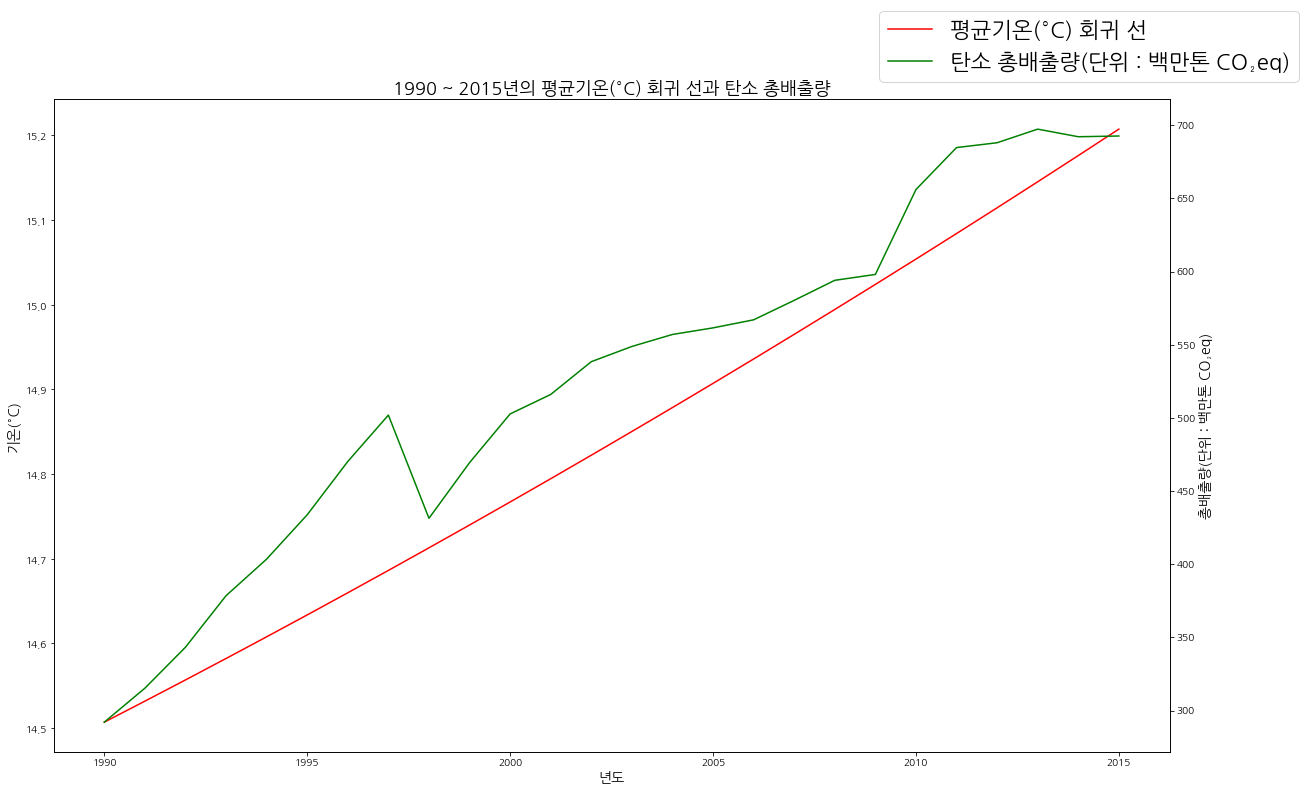

In [ ]:
fig, ax1 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(12)
ax1.plot(res['평균기온(°C) 회귀 선'], c = 'r', label = '평균기온(°C) 회귀 선')
ax2 = ax1.twinx()
ax2.plot(res['탄소 총배출량'], c = 'g', label = '탄소 총배출량(단위 : 백만톤 CO₂eq)')
ax1.set_title(str(start_year) + ' ~ ' + str(end_year) + '년의 평균기온(°C) 회귀 선과 탄소 총배출량', fontsize = 18)
ax1.set_xlabel('년도', fontsize = 14)
ax1.set_ylabel('기온(°C)', fontsize = 14)
ax2.set_ylabel('총배출량(단위 : 백만톤 CO₂eq)', fontsize = 14)
fig.legend(fontsize = 22)

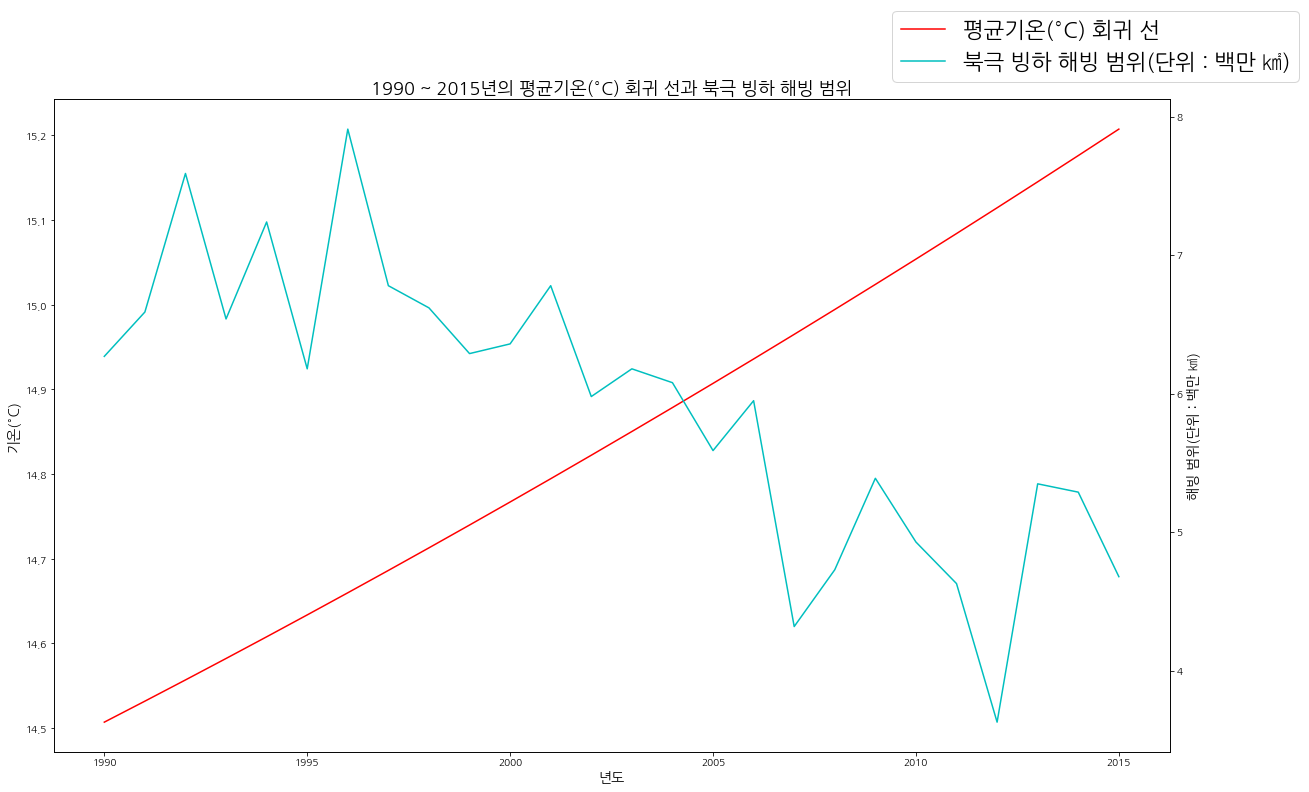

In [ ]:
fig, ax1 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(12)
ax1.plot(res['평균기온(°C) 회귀 선'], c = 'r', label = '평균기온(°C) 회귀 선')
ax2 = ax1.twinx()
ax2.plot(res['북극 빙하 해빙 범위'], c = 'c', label = '북극 빙하 해빙 범위(단위 : 백만 ㎢)')
ax1.set_title(str(start_year) + ' ~ ' + str(end_year) + '년의 평균기온(°C) 회귀 선과 북극 빙하 해빙 범위', fontsize = 18)
ax1.set_xlabel('년도', fontsize = 14)
ax1.set_ylabel('기온(°C)', fontsize = 14)
ax2.set_ylabel('해빙 범위(단위 : 백만 ㎢)', fontsize = 14)
fig.legend(fontsize = 22)

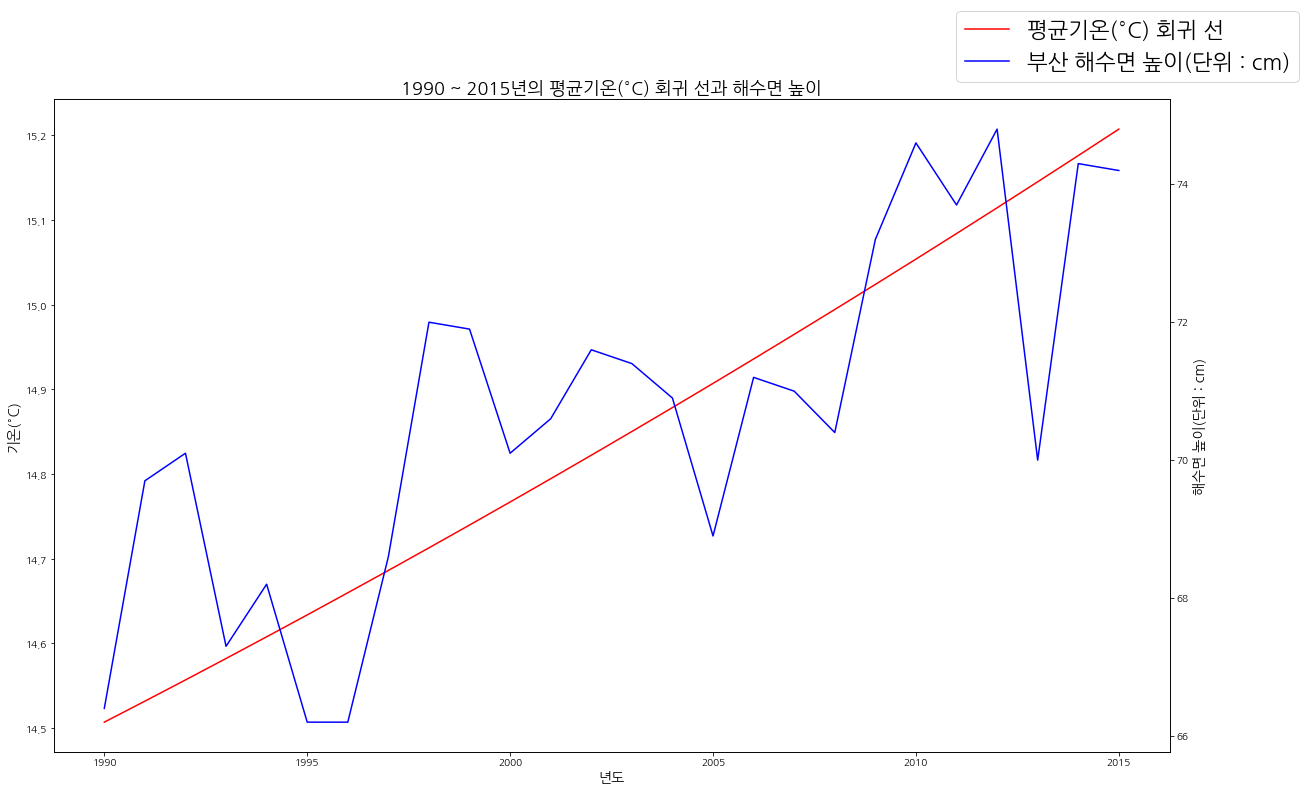

In [ ]:
fig, ax1 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(12)
ax1.plot(res['평균기온(°C) 회귀 선'], c = 'r', label = '평균기온(°C) 회귀 선')
ax2 = ax1.twinx()
ax2.plot(res['부산 해수면 높이'], c = 'b', label = '부산 해수면 높이(단위 : cm)')
ax1.set_title(str(start_year) + ' ~ ' + str(end_year) + '년의 평균기온(°C) 회귀 선과 해수면 높이', fontsize = 18)
ax1.set_xlabel('년도', fontsize = 14)
ax1.set_ylabel('기온(°C)', fontsize = 14)
ax2.set_ylabel('해수면 높이(단위 : cm)', fontsize = 14)
fig.legend(fontsize = 22)

(-0.5, 616.5, 250.5, -0.5)

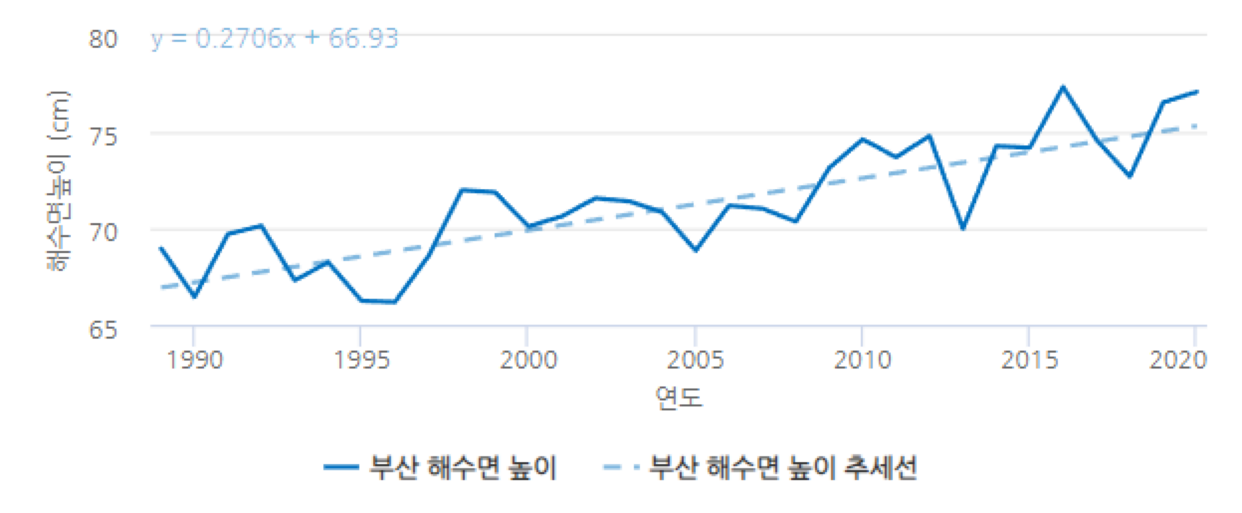

In [ ]:
import matplotlib.image as img

im = img.imread(path + 'BusanSeaLevelLine.PNG')
plt.figure(figsize = (22, 22))
plt.imshow(im)
plt.axis('off')

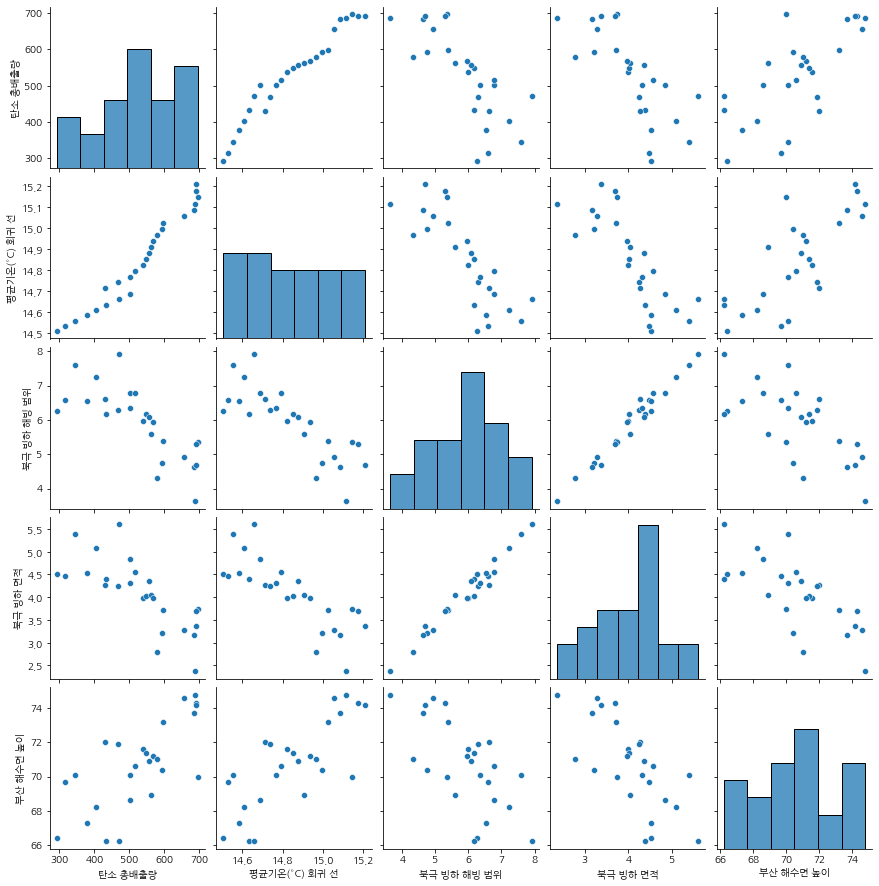

In [ ]:
import seaborn as sns

sns.pairplot(res)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

warnings.filterwarnings(action = 'ignore')

def auto_arima(data, order):
  order_list = []
  aic_list = []

  for p in range(order[0]):
    for d in range(order[1]):
      for q in range(order[2]):
        model = ARIMA(data, order=(p, d, q))

        try:
          model_fit = model.fit()
          c_order = f'p{p} d{d} q{q}'
          aic = model_fit.aic
          bic = model_fit.bic
          order_list.append(c_order)
          aic_list.append(aic)
        except:
          pass

  result_df = pd.DataFrame(list(zip(order_list, aic_list)), columns = ['order', 'AIC'])
  result_df.sort_values('AIC', inplace = True)

  return result_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = auto_arima(ce['총배출량'], [3, 3, 3])
df

,order,AIC
6,p0 d2 q1,262.150819
13,p1 d2 q2,263.762032
12,p1 d2 q1,263.895935
19,p2 d2 q1,264.759364
20,p2 d2 q2,266.844198
2,p0 d1 q0,267.490778
3,p0 d1 q1,269.348233
10,p1 d1 q0,269.389965
4,p0 d1 q2,270.671133
15,p2 d1 q0,270.772146


In [ ]:
model = ARIMA(ce['총배출량'], order = (0, 2, 1))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D2.총배출량   No. Observations:                   28
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -129.289
Method:                       css-mle   S.D. of innovations             23.691
Date:                Mon, 23 May 2022   AIC                            262.578
Time:                        10:25:29   BIC                            265.243
Sample:                             2   HQIC                           263.393
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ma.L1.D2.총배출량    -0.9205      0.119     -7.725      0.000      -1.154      -0.687
                                    Roots                                    
                  Real          Imaginary   

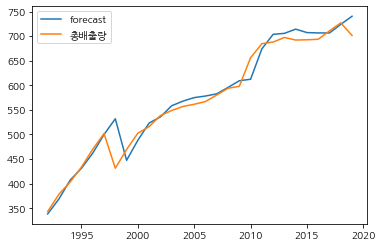

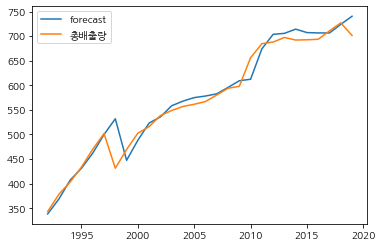

In [ ]:
model_fit.plot_predict()

In [ ]:
def Predict_Temperature_With_Carbon(car, tem, year, add = 0):
  scope = year - car.index[-1]
  
  x = np.asarray(car).reshape(-1, 1)
  poly_x = Poly(x)
  x_pred = np.concatenate([car.values, model_fit.forecast(steps = scope)[0]]).reshape(-1, 1) + add
  poly_x_pred = Poly(x_pred)
  y = np.asarray(tem)
  
  lr = LinearRegression()
  lr.fit(x, y)
  y_predict = lr.predict(x)
  rmse = np.sqrt(mean_squared_error(y, y_predict))

  poly_lr = LinearRegression()
  poly_lr.fit(poly_x, y)
  poly_y_predict = poly_lr.predict(poly_x)
  poly_rmse = np.sqrt(mean_squared_error(y, poly_y_predict))

  if rmse > poly_rmse:
    lr = poly_lr
    x_pred = poly_x_pred
    y_predict = poly_y_predict

  y_pred = lr.predict(x_pred)

  return y_pred

                  예측 보고서(탄소 기준)
-------------------------------------------------------
2015년의 탄소 총배출량 : 692.6
2100년의 예측 탄소 총배출량 : 1582.481(0)
-------------------------------------------------------
2015년의 평균기온 평균값 : 15.207
2015년의 평균기온 최대값 : 16.294
2100년의 예측 평균기온 평균값 : 18.603
2100년의 예측 평균기온 최대값 : 19.69
-------------------------------------------------------
2015년의 북극 빙하 해빙 범위 : 4.68
2100년의 예측 북극 빙하 해빙 범위(기온 평균값) : 0.0
2100년의 예측 북극 빙하 해빙 범위(기온 최대값) : 0.0
-------------------------------------------------------
2015년의 북극 빙하 면적 : 3.37
2100년의 예측 북극 빙하 면적(기온 평균값) : 0.0
2100년의 예측 북극 빙하 면적(기온 최대값) : 0.0
-------------------------------------------------------
2015년의 부산 해수면 높이 : 74.2
2100년의 예측 부산 해수면 높이(기온 평균값) : 105.185
2100년의 예측 부산 해수면 높이(기온 최대값) : 115.165
-------------------------------------------------------


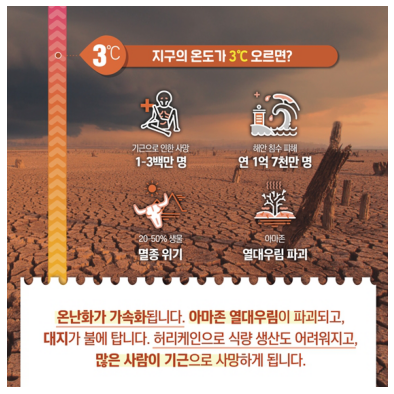

In [ ]:
#@title 기온 예측 보고서
year = 2100 #@param {type : 'slider', min : 2022, max : 2100, step : 1}
carbon_check = True #@param {type : 'boolean'}

if carbon_check:
  add_carbon = 0 #@param {type : 'slider', min : 0, max : 10000, step : 1}

  #탄소 예측
  scope = year - res['탄소 총배출량'].index[-1]
  carbon_pred = model_fit.forecast(steps = scope)[0][-1] + add_carbon

  #기온 예측(탄소 기준)
  x = res['탄소 총배출량']
  y = res['평균기온(°C) 회귀 선']

  tp_pred = Predict_Temperature_With_Carbon(x, y, year, add_carbon)
  tp_pred = np.asarray(tp_pred[-1]).reshape(1)
  tp_pred_max = tp_pred + tp_diff
else:
  #기온 예측(년도 기준)
  tp_pred, tp_pred_max = Predict_Temperature(tp['평균기온(°C)'], year, visual = False)
  tp_pred = np.asarray(tp_pred[-1]).reshape(1)
  tp_pred_max = np.asarray(tp_pred_max[-1]).reshape(1)

#북극 빙하 해빙 범위, 면적 예측
x = res[['평균기온(°C) 회귀 선']]
y1 = res['북극 빙하 해빙 범위']
y2 = res['북극 빙하 면적']

lr1 = LinearRegression()
lr1.fit(x, y1)

lr2 = LinearRegression()
lr2.fit(x, y2)

extent_pred = lr1.predict(tp_pred.reshape(1, -1))
extent_pred_max = lr1.predict(tp_pred_max.reshape(1, -1))

if extent_pred < 0:
  extent_pred = [0.0]

if extent_pred_max < 0:
  extent_pred_max = [0.0]

area_pred = lr2.predict(tp_pred.reshape(1, -1))
area_pred_max = lr2.predict(tp_pred_max.reshape(1, -1))

if area_pred < 0:
  area_pred = [0.0]

if area_pred_max < 0:
  area_pred_max = [0.0]

#부산 해수면 높이 예측
x = res[['평균기온(°C) 회귀 선']]
y = res['부산 해수면 높이']

lr = LinearRegression()
lr.fit(x, y)

sealevel_pred = lr.predict(tp_pred.reshape(1, -1))
sealevel_pred_max = lr.predict(tp_pred_max.reshape(1, -1))

#예측 보고서 출력
if carbon_check:
  print(' ' * 18 + '예측 보고서(탄소 기준)')
  print('-' * 55)
  print(str(res.index[-1]) + '년의 탄소 총배출량 :', res['탄소 총배출량'].iloc[-1])
  print(str(year) + '년의 예측 탄소 총배출량 : ' + str(round(carbon_pred, 3)) + '(' + str(add_carbon) + ')')
else:
  print(' ' * 18 + '예측 보고서(년도 기준)')

print('-' * 55)
print(str(res.index[-1]) + '년의 평균기온 평균값 :', round(res['평균기온(°C) 회귀 선'].iloc[-1], 3))
print(str(res.index[-1]) + '년의 평균기온 최대값 :', round(res['평균기온(°C) 회귀 선'].iloc[-1] + tp_diff, 3))
print(str(year) + '년의 예측 평균기온 평균값 :', round(*tp_pred, 3))
print(str(year) + '년의 예측 평균기온 최대값 :', round(*tp_pred_max, 3))
print('-' * 55)
print(str(res.index[-1]) + '년의 북극 빙하 해빙 범위 :', round(res['북극 빙하 해빙 범위'].iloc[-1], 3))
print(str(year) + '년의 예측 북극 빙하 해빙 범위(기온 평균값) :', round(*extent_pred, 3))
print(str(year) + '년의 예측 북극 빙하 해빙 범위(기온 최대값) :', round(*extent_pred_max, 3))
print('-' * 55)
print(str(res.index[-1]) + '년의 북극 빙하 면적 :', round(res['북극 빙하 면적'].iloc[-1], 3))
print(str(year) + '년의 예측 북극 빙하 면적(기온 평균값) :', round(*area_pred, 3))
print(str(year) + '년의 예측 북극 빙하 면적(기온 최대값) :', round(*area_pred_max, 3))
print('-' * 55)
print(str(res.index[-1]) + '년의 부산 해수면 높이 :', round(res['부산 해수면 높이'].iloc[-1], 3))
print(str(year) + '년의 예측 부산 해수면 높이(기온 평균값) :', round(*sealevel_pred, 3))
print(str(year) + '년의 예측 부산 해수면 높이(기온 최대값) :', round(*sealevel_pred_max, 3))
print('-' * 55)

diff = int(round(*tp_pred - res['평균기온(°C) 회귀 선'].iloc[-1], 0))

if diff > 0:
  import matplotlib.image as img
  
  im_lst = [path + 'Temperature' + str(i) + '.jpg' for i in range(1, 7)]

  if diff > 6:
    diff = 6

  im = img.imread(im_lst[diff - 1])
  plt.figure(figsize = (7, 7))
  plt.imshow(im)
  plt.axis('off')

In [ ]:
#@title 기온 예측값 GUI Test

text = '' #@param {type : "string"}
dropdown = '1st option' #@param ["1st option", "2nd option", "3nd option"]
text_and_dropdown = '2nd option' #@param ["1st option", "2nd option", "3nd option"]
date_input="2022-05-21" #@param{type : "date"}
number_input=10.0 #@param{type : "number"}
number_slider = -1 #@param{type : "slider", min : -1, max : 1,step : 0.1}

integer_input = 10 #@param {type : "integer"}
integer_slider = 1960 #@param {type : "slider", min : 1960, max : 2100, step : 1}

boolean_checkbox = False #@param {type : 'boolean'}
boolean_dropdown = True #@param ["False", "True"]{type : "raw"}